In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

| Context Source | Category | Text Memory | Vision Memory | Delta (Text - Vision) |
| :--- | :--- | :---: | :---: | :---: |
| **Text Context** | People-Location | 3.9 | 9.1 | -5.2 |
| | People-Temporal | 0 | 0 | 0 |
| | People-Career | 58.0 | 81.8 | -25.8 |
| | Logo-Time | 0 | 2.4 | -2.4 |
| | Logo-Creator | 60 | 63.1 | -3.1 |
| | Logo-Content | 71.2 | 87.0 | -15.8 |
| **Vision Context** | People-Location | 25.0 | 19.8 | 5.2 |
| | People-Temporal | 0 | 0 | 0 |
| | People-Career | 88.0 | 85.4 | 2.6 |
| | Logo-Time | 4.8 | 4.8 | 0 |
| | Logo-Creator | 74.6 | 73.8 | 0.8 |
| | Logo-Content | 96.6 | 96.6 | 0 |

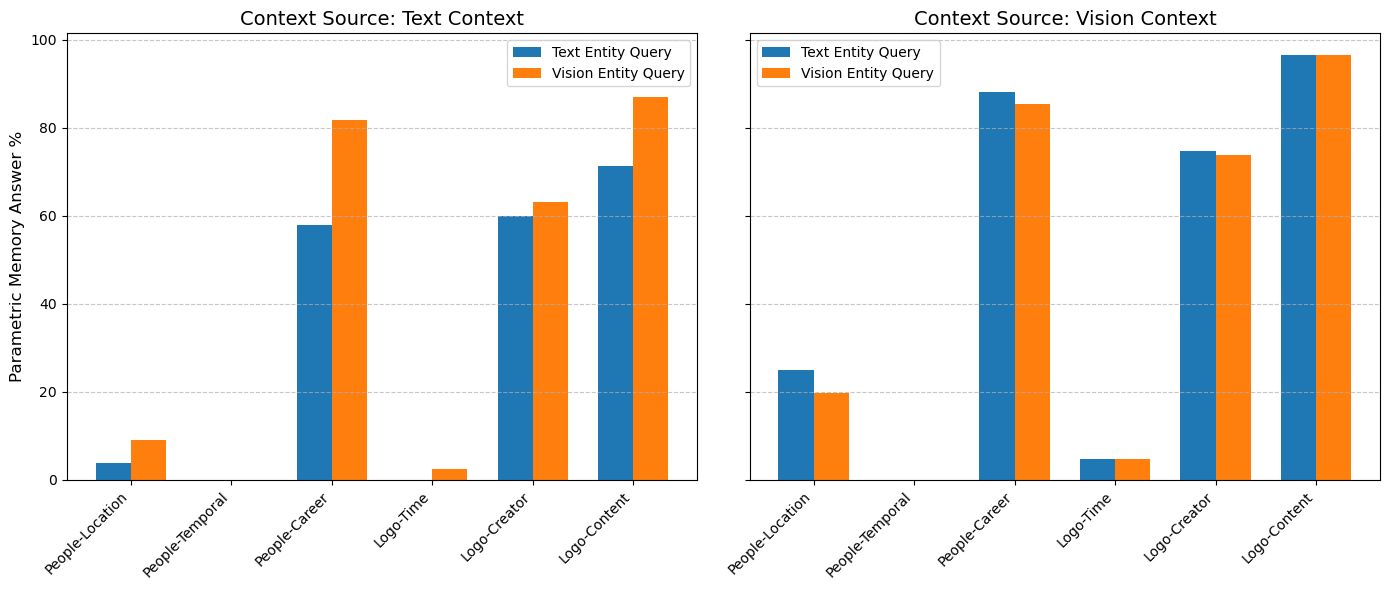

In [2]:


# Data from the user's table
data = {
    'Category': ['People-Location', 'People-Temporal', 'People-Career', 'Logo-Time', 'Logo-Creator', 'Logo-Content'],
    'Text_Context_Text_Mem': [3.9, 0, 58.0, 0, 60.0, 71.2],
    'Text_Context_Vision_Mem': [9.1, 0, 81.8, 2.4, 63.1, 87.0],
    'Vision_Context_Text_Mem': [25.0, 0, 88.0, 4.8, 74.6, 96.6],
    'Vision_Context_Vision_Mem': [19.8, 0, 85.4, 4.8, 73.8, 96.6]
}
df = pd.DataFrame(data)

# Setup the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(data['Category']))

# Plot 1: Context Source = Text Context
# Comparing Text Memory vs Vision Memory within the "Text Context" source
bars1 = axes[0].bar(index - bar_width/2, df['Text_Context_Text_Mem'], bar_width, label='Text Entity Query', color='#1f77b4')
bars2 = axes[0].bar(index + bar_width/2, df['Text_Context_Vision_Mem'], bar_width, label='Vision Entity Query', color='#ff7f0e')

axes[0].set_title('Context Source: Text Context', fontsize=14)
axes[0].set_ylabel('Parametric Memory Answer %', fontsize=12)
axes[0].set_xticks(index)
axes[0].set_xticklabels(data['Category'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Context Source = Vision Context
# Comparing Text Memory vs Vision Memory within the "Vision Context" source
bars3 = axes[1].bar(index - bar_width/2, df['Vision_Context_Text_Mem'], bar_width, label='Text Entity Query', color='#1f77b4')
bars4 = axes[1].bar(index + bar_width/2, df['Vision_Context_Vision_Mem'], bar_width, label='Vision Entity Query', color='#ff7f0e')

axes[1].set_title('Context Source: Vision Context', fontsize=14)
axes[1].set_xticks(index)
axes[1].set_xticklabels(data['Category'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add a delta annotation for significant differences could be cool, but let's keep it clean first.
# Just layout adjustment
plt.tight_layout()

# Save the figure
plt.savefig('memory_comparison_chart.png')

# Benchmarking knowledge about celebrities

## Get Rid of celebrities the model cannot recognize

In [3]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/WHO_VISION_Experiment_Results.csv")
df['Knows_celeb'] = df.apply(lambda row: row['Instance'] in row['Response'], axis=1)

In [4]:
unknown_celebs = df[df["Knows_celeb"] == False]['Instance'].unique() 
unknown_celebs = unknown_celebs[1:] # "Remove The Rock from unknown list bc it knows Dwayne Johnson"
unknown_celebs

array(['Post Malone', 'Natalie Portman', 'Jet Li', 'John Green', 'Eminem',
       'Travis Scott', 'Megan Thee Stallion', 'J Balvin'], dtype=object)

## Find rows which the model answer correct using parametric vision and language knowledge

In [5]:
df_inherent_vision = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results.csv")
df_inherent_vision['Response'].iloc[0]

'system\nYou are a helpful assistant.\nuser\nGiven your knowledge, answer the multiple choice question about the following entity.\nEntity: \nQuery: What year was the entity born? Answers: A) 1988 B) 1990 C) 1989 D) 1986\nassistant\nBetween A, B, C, and D, the answer is 1989.'

In [6]:

def actual_ans(row):
    query_list = row['Query'].split(" ")
    ans_GT = query_list[query_list.index(row['Ground_Truth']+")") + 1]
    ans_Param = query_list[query_list.index(row['Mis_Answer_Label']+")") + 1]
    return ans_GT, ans_Param
actual_ans(df_inherent_vision.iloc[0])
gt_list = []
param_list = []
for i in range(df_inherent_vision.shape[0]):
    gt, param = actual_ans(df_inherent_vision.iloc[0])
    gt_list.append(gt)
    param_list.append(param)
df_inherent_vision['Actual_GT'] = gt_list
df_inherent_vision['Actual_Param'] = param_list
df_inherent_vision


,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label,Actual_GT,Actual_Param
0,1,Taylor Swift,Temporal_error,mis_knowledge1,NaN,What year was the entity born? Answers: A) 198...,system\nYou are a helpful assistant.\nuser\nGi...,0.055725,0.098572,0.838379,0.007481,C,A,1989,1988
1,1,Taylor Swift,location_error,mis_knowledge1,NaN,What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nGi...,0.011787,0.006115,0.000635,0.981445,D,B,1989,1988
2,1,Taylor Swift,Career_error,mis_knowledge1,NaN,What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nGi...,0.999512,0.000392,0.000019,0.000054,A,B,1989,1988
3,2,Elon Musk,Temporal_error,mis_knowledge1,NaN,What year was the entity born? Answers: A) 197...,system\nYou are a helpful assistant.\nuser\nGi...,0.010124,0.636230,0.237793,0.115845,C,A,1989,1988
4,2,Elon Musk,location_error,mis_knowledge1,NaN,What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nGi...,0.958984,0.001837,0.037781,0.001303,A,C,1989,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,148,Chadwick Boseman,location_error,mis_knowledge1,NaN,What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nGi...,0.015144,0.001547,0.001572,0.981934,D,C,1989,1988
443,148,Chadwick Boseman,Career_error,mis_knowledge1,NaN,What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nGi...,0.001387,0.000635,0.997559,0.000655,C,B,1989,1988
444,149,Lupita Nyong'o,Temporal_error,mis_knowledge1,NaN,What year was the entity born? Answers: A) 198...,system\nYou are a helpful assistant.\nuser\nGi...,0.152344,0.280273,0.098328,0.469238,D,B,1989,1988
445,149,Lupita Nyong'o,location_error,mis_knowledge1,NaN,What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nGi...,0.277832,0.519043,0.185059,0.017899,B,A,1989,1988


In [7]:
df_inherent_text = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_Experiment_Results.csv")
df_inherent_vision = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results.csv")
df_inherent_text

def get_correct_indices(df):
    # 1. Define the probability columns
    prob_cols = ['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']
    
    # 2. Find the column name with the max value for each row (e.g., "Prob_A")
    # idxmax(axis=1) returns the column label of the maximum value
    predicted_col = df[prob_cols].idxmax(axis=1)
    
    # 3. Clean the prediction to match Ground_Truth format (e.g., "Prob_A" -> "A")
    predicted_choice = predicted_col.str.replace('Prob_', '')
    
    # 4. Compare with Ground Truth
    # We strip whitespace from both just to be safe (e.g. " A" vs "A")
    is_correct = predicted_choice.str.strip() == df['Ground_Truth'].str.strip()
    
    return is_correct

# Get the boolean mask (True/False) for both dataframes
text_correct_mask = get_correct_indices(df_inherent_text)
vision_correct_mask = get_correct_indices(df_inherent_vision)

# Find where BOTH are True
# We use the bitwise AND operator '&'
both_correct_mask = text_correct_mask & vision_correct_mask

# Extract the actual indices
correct_indices = df_inherent_text.index[both_correct_mask].tolist()

print(f"Number of matches: {len(correct_indices)}")
print("Indices:", correct_indices)

Number of matches: 297
Indices: [0, 1, 2, 4, 5, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 52, 53, 56, 58, 59, 61, 62, 64, 65, 67, 68, 69, 70, 71, 73, 74, 77, 80, 82, 83, 85, 86, 88, 89, 90, 91, 92, 94, 95, 98, 100, 101, 102, 103, 104, 105, 107, 110, 113, 115, 116, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134, 135, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 150, 152, 154, 155, 157, 158, 160, 161, 163, 164, 167, 168, 170, 171, 172, 173, 175, 176, 178, 179, 181, 182, 185, 187, 188, 190, 191, 193, 194, 196, 197, 199, 200, 202, 203, 205, 206, 208, 209, 211, 212, 213, 214, 215, 217, 218, 220, 221, 223, 224, 226, 227, 229, 230, 231, 232, 233, 235, 236, 238, 239, 240, 241, 242, 245, 247, 248, 251, 253, 254, 256, 257, 259, 260, 261, 262, 263, 265, 266, 268, 269, 271, 272, 274, 275, 276, 277, 278, 280, 281, 284, 286, 287, 289, 290, 292, 293, 294, 296, 299, 301, 302, 304, 305, 306, 307, 308, 310, 311, 313

## Visualization and Analysis

In [8]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df = df[~df['Instance'].isin(unknown_celebs)]
df

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Top_decoded_token,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Taylor Swift,Temporal_error,mis_knowledge1,"Taylor Swift was born on December 13, 1988. Ta...",What year was the entity born? Answers: A) 198...,system\nYou are a helpful assistant.\nuser\nCo...,A,0.990234,0.005844,0.002718,0.001160,C,A
1,1,Taylor Swift,Temporal_error,mis_knowledge2,"Taylor Swift was born on December 13, 1990. Ta...",What year was the entity born? Answers: A) 198...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.000505,0.994629,0.004292,0.000690,C,B
2,1,Taylor Swift,location_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.000068,0.997070,0.002396,0.000558,D,B
3,1,Taylor Swift,location_error,mis_knowledge2,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,D,0.194946,0.180298,0.028763,0.595703,D,A
4,1,Taylor Swift,Career_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.022430,0.968750,0.008713,0.000299,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,148,Chadwick Boseman,Career_error,mis_knowledge2,"Chadwick Boseman was born on November 29, 1976...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,C,0.292480,0.017426,0.685547,0.004803,C,A
576,149,Lupita Nyong'o,location_error,mis_knowledge1,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,A,0.993164,0.005905,0.000964,0.000133,B,A
577,149,Lupita Nyong'o,location_error,mis_knowledge2,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,C,0.000086,0.000699,0.999023,0.000117,B,C
578,149,Lupita Nyong'o,Career_error,mis_knowledge1,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,A,0.666992,0.322510,0.008080,0.002192,B,A


In [9]:
print(df['Response'].iloc[0])

system
You are a helpful assistant.
user
Context information is below.
---------------------
Taylor Swift was born on December 13, 1988. Taylor Swift is American. Taylor Swift is a singer-songwriter.
---------------------
Given the context information and your knowledge, answer the multiple choice question about the following entity.
Entity: Taylor Swift.
Query: What year was the entity born? Answers: A) 1988 B) 1990 C) 1989 D) 1986. Answer with only one letter (A, B, C, or D).
assistant
A


In [10]:
df['Category'].value_counts()

Category
Career_error      274
location_error    232
Temporal_error     46
Name: count, dtype: int64

Overall Accuracy: 29.89%
Category
Career_error      54.379562
Temporal_error     0.000000
location_error     6.896552
Name: Is_Correct, dtype: float64


/tmp/ipykernel_3214383/3291027162.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


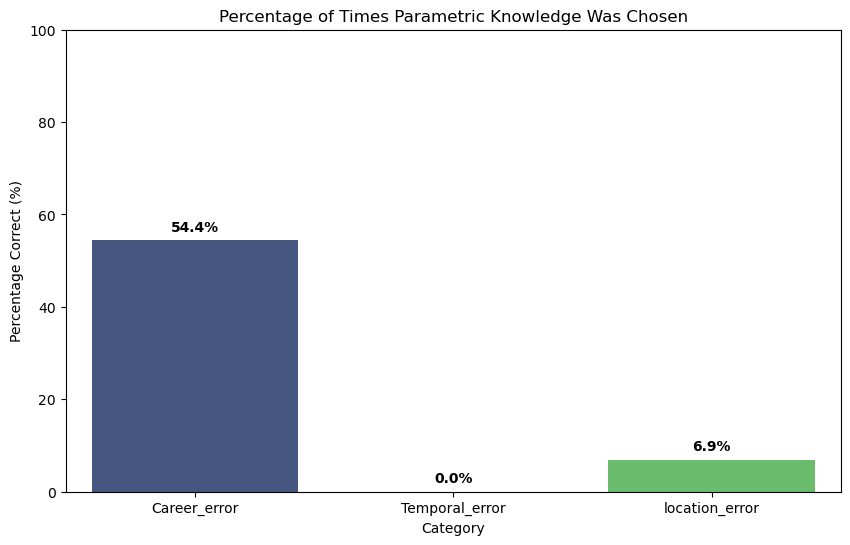

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('Percentage of Times Parametric Knowledge Was Chosen')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

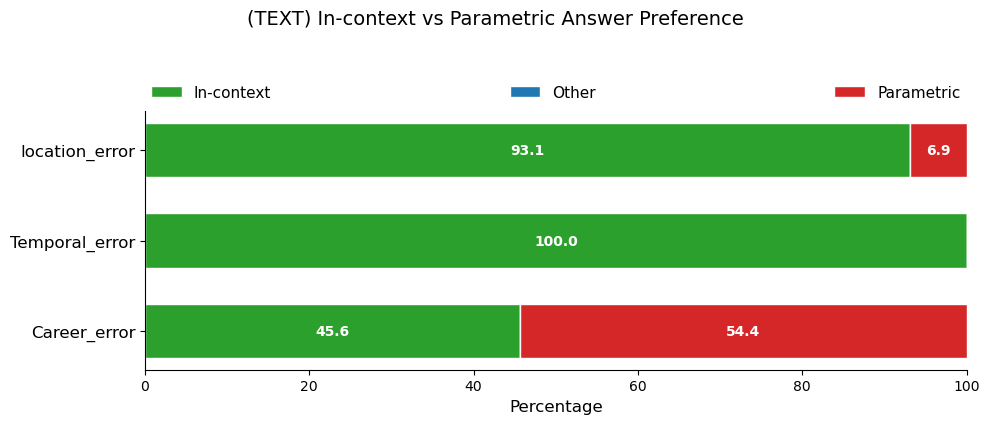

In [13]:
def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(TEXT) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [22]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_Experiment_Results.csv")
df = df[~df['Instance'].isin(unknown_celebs)]
print(df['Response'].iloc[25])

system
You are a helpful assistant.
user
Given your knowledge, answer the multiple choice question about the following entity.
Entity: Tom Hanks.
Query: What is the nationality of the entity? Answers: A) Canadian B) American C) Mexican D) Panamanian
assistant
Between A, B, C, and D, the answer is  B) American. Tom Hanks is an American actor and filmmaker.


Overall Accuracy: 72.81%
Category
Career_error      100.000000
Temporal_error     28.368794
location_error     90.070922
Name: Is_Correct, dtype: float64


/tmp/ipykernel_3214383/3089483106.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


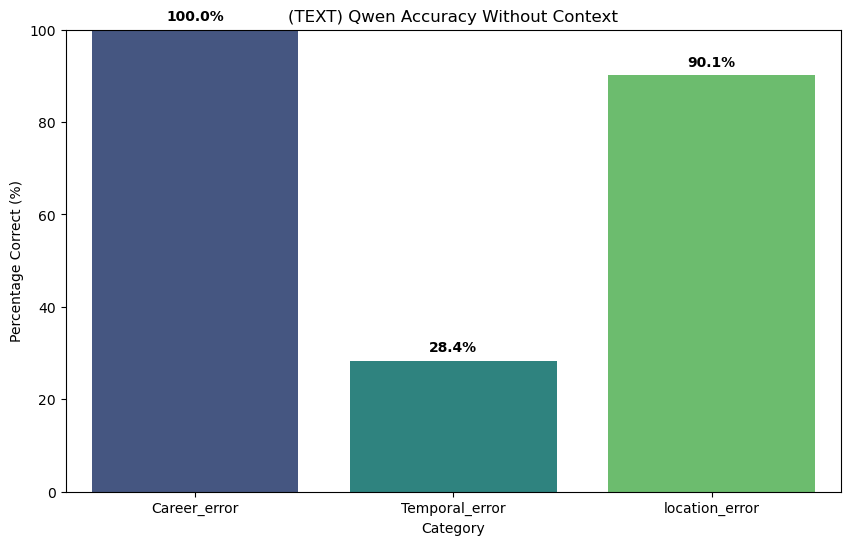

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('(TEXT) Qwen Accuracy Without Context')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

In [75]:
split_func = lambda x: x.split('Between A, B, C, and D, the answer is  ')[-1][0]
df['str_resp'] = df['Response'].apply(split_func)
(df['str_resp'] == df['Predicted_Choice'])

0      False
1       True
2       True
3      False
4       True
       ...  
442     True
443     True
444    False
445     True
446     True
Length: 423, dtype: bool

In [25]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_VISION_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df = df[~df['Instance'].isin(unknown_celebs)]
print(df['Response'].iloc[25])

system
You are a helpful assistant.
user
Context information is below.
---------------------
Kanye West was born on June 8, 1977. Kanye West is American. Kanye West is a rapper, architect, and fashion designer.
---------------------
Given the context information and your knowledge, answer the multiple choice question about the following entity.
Entity: 
Query: What is the occupation of the entity? Answers: A) chef B) botanist, gardener, landscaper C) rapper D) architect. Answer with only one letter (A, B, C, or D).
assistant
C


In [26]:
df['Category'].value_counts()

Category
Career_error      274
location_error    232
Temporal_error     46
Name: count, dtype: int64

Overall Accuracy: 42.93%
Category
Career_error      77.007299
Temporal_error     0.000000
location_error    11.206897
Name: Is_Correct, dtype: float64


/tmp/ipykernel_3214383/311489245.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


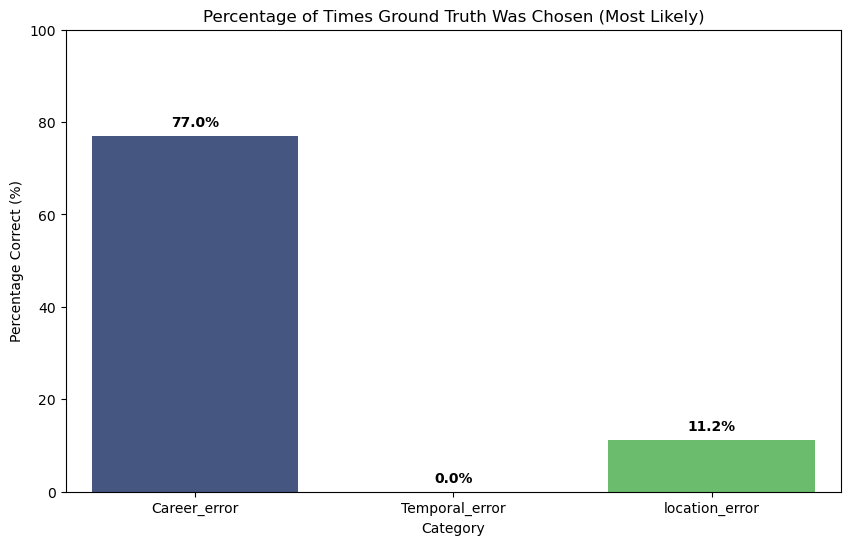

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('Percentage of Times Ground Truth Was Chosen (Most Likely)')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

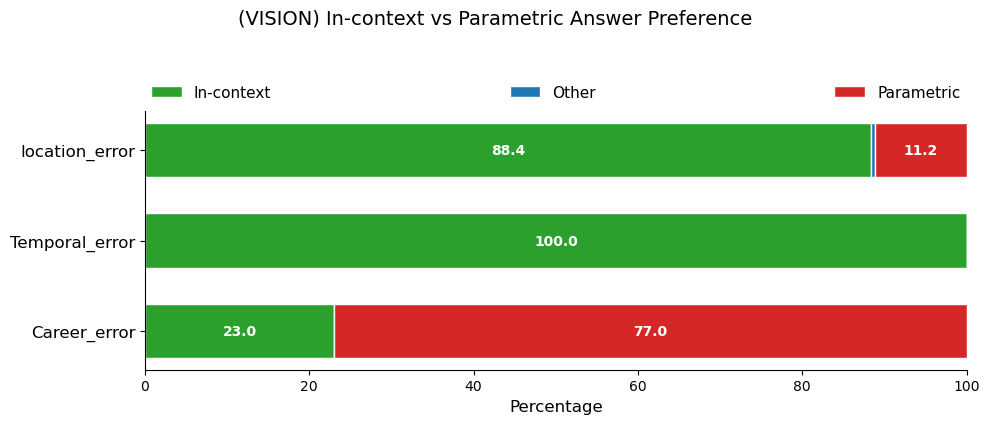

In [28]:
def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(VISION) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [29]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results.csv")
df = df[~df['Instance'].isin(unknown_celebs)]
print(df['Response'].iloc[27])

system
You are a helpful assistant.
user
Given your knowledge, answer the multiple choice question about the following entity.
Entity: 
Query: What year was the entity born? Answers: A) 1969 B) 1966 C) 1970 D) 1968
assistant
Between A, B, C, and D, the answer is 1970.


Overall Accuracy: 70.69%
Category
Career_error      100.000000
Temporal_error     24.822695
location_error     87.234043
Name: Is_Correct, dtype: float64


/tmp/ipykernel_1089477/3457152067.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


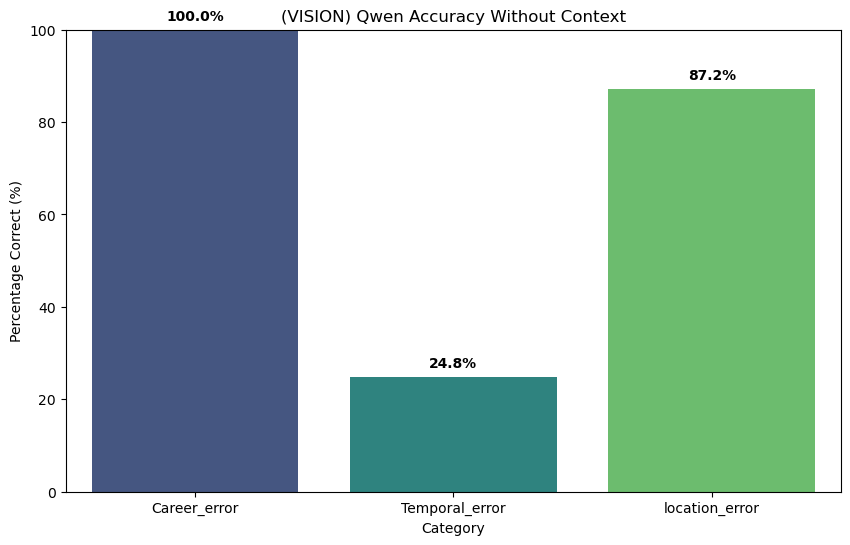

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('(VISION) Qwen Accuracy Without Context')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

## Vision vs Language with Image context

In [82]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/Image_RAG_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df = df[~df['Instance'].isin(unknown_celebs)]
df

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Taylor Swift,Temporal_error,mis_knowledge1,"The person pictured was born on December 13, 1...",What year was the entity born? Answers: A) 198...,system\nYou are a helpful assistant.\nuser\nCo...,0.985352,0.010948,0.001349,0.002241,C,A
1,1,Taylor Swift,Temporal_error,mis_knowledge2,"The person pictured was born on December 13, 1...",What year was the entity born? Answers: A) 198...,system\nYou are a helpful assistant.\nuser\nCo...,0.001306,0.992188,0.003778,0.002920,C,B
2,1,Taylor Swift,location_error,mis_knowledge1,"The person pictured was born on December 13, 1...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,0.000278,0.999023,0.000310,0.000462,D,B
3,1,Taylor Swift,location_error,mis_knowledge2,"The person pictured was born on December 13, 1...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,0.057800,0.298096,0.003160,0.641113,D,A
4,1,Taylor Swift,Career_error,mis_knowledge1,"The person pictured was born on December 13, 1...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.762695,0.236328,0.000550,0.000329,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,148,Chadwick Boseman,Career_error,mis_knowledge2,"The person pictured was born on November 29, 1...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.251953,0.004951,0.740723,0.002394,C,A
576,149,Lupita Nyong'o,location_error,mis_knowledge1,"The person pictured was born on March 1, 1983....",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,0.998047,0.002066,0.000052,0.000057,B,A
577,149,Lupita Nyong'o,location_error,mis_knowledge2,"The person pictured was born on March 1, 1983....",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,0.000546,0.003170,0.995605,0.000439,B,C
578,149,Lupita Nyong'o,Career_error,mis_knowledge1,"The person pictured was born on March 1, 1983....",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.373291,0.625488,0.000333,0.001057,B,A


Overall Accuracy: 54.17%
Category
Career_error      87.956204
Temporal_error     0.000000
location_error    25.000000
Name: Is_Correct, dtype: float64


/tmp/ipykernel_1089477/311489245.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


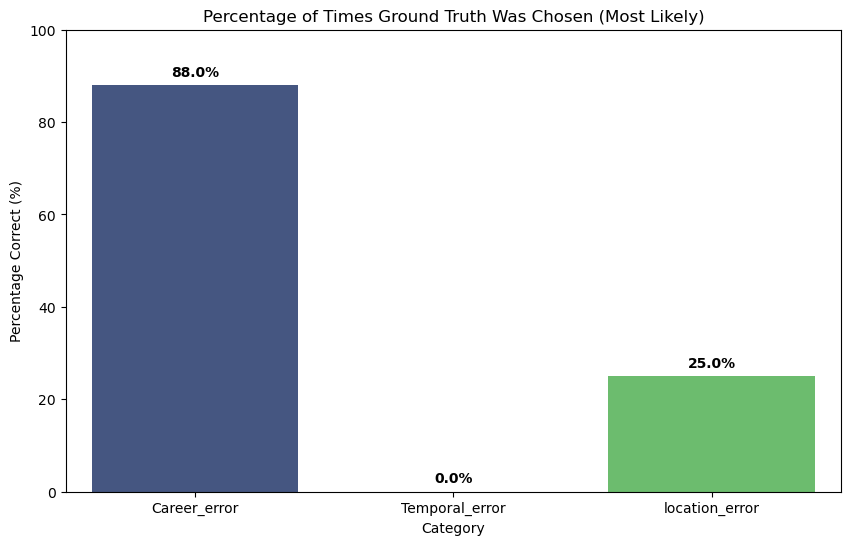

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('Percentage of Times Ground Truth Was Chosen (Most Likely)')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

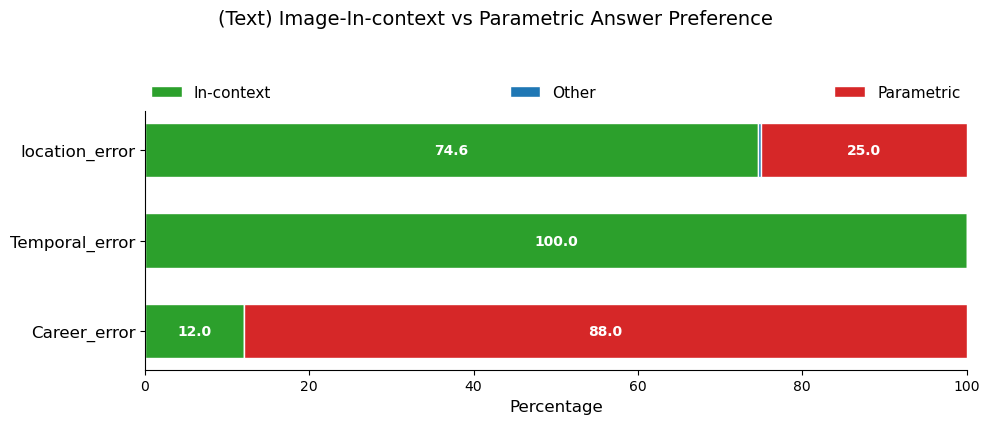

In [84]:
def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(Text) Image-In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [85]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/Image_RAG_VISION_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df = df[~df['Instance'].isin(unknown_celebs)]
#df

Overall Accuracy: 50.72%
Category
Career_error      85.401460
Temporal_error     0.000000
location_error    19.827586
Name: Is_Correct, dtype: float64


/tmp/ipykernel_1089477/311489245.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


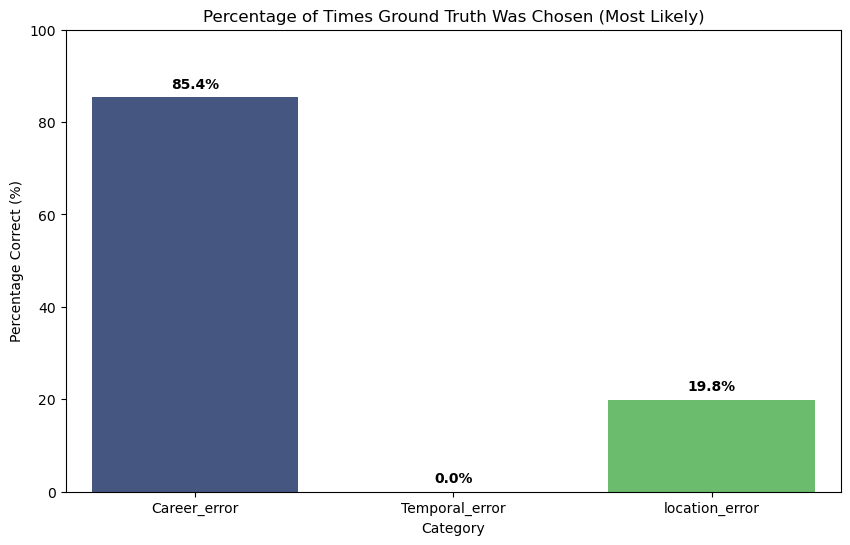

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('Percentage of Times Ground Truth Was Chosen (Most Likely)')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

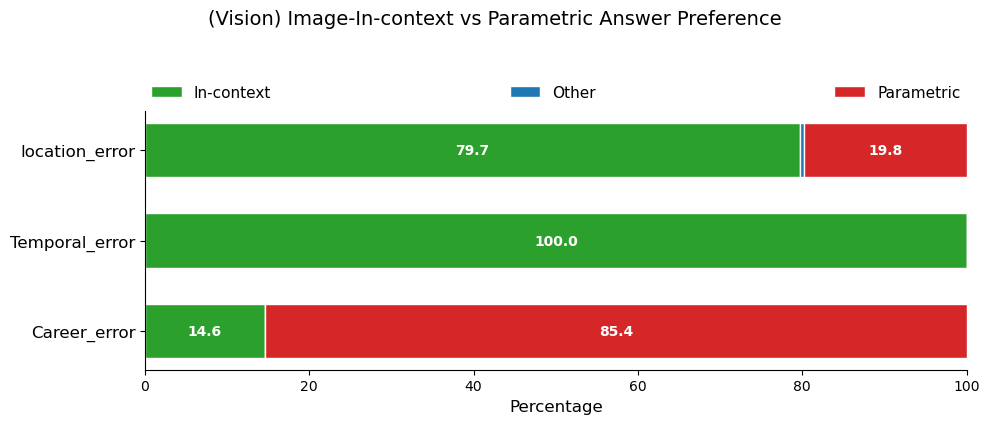

In [87]:
def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(Vision) Image-In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [88]:
outcome_pct 

Outcome,In-context,Other,Parametric
Category,,,
Career_error,14.598540,0.000000,85.401460
Temporal_error,100.000000,0.000000,0.000000
location_error,79.741379,0.431034,19.827586


## Compare Vision to Language cases

In [89]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_Experiment_Results.csv")
df = df.iloc[correct_indices]
df_lang = df[~df['Instance'].isin(unknown_celebs)]
df_lang
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results.csv")
df = df.iloc[correct_indices]
df_vis = df[~df['Instance'].isin(unknown_celebs)]
df_vis

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Taylor Swift,Temporal_error,mis_knowledge1,NaN,What year was the entity born? Answers: A) 198...,system\nYou are a helpful assistant.\nuser\nGi...,0.055725,0.098572,0.838379,0.007481,C,A
1,1,Taylor Swift,location_error,mis_knowledge1,NaN,What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nGi...,0.011787,0.006115,0.000635,0.981445,D,B
2,1,Taylor Swift,Career_error,mis_knowledge1,NaN,What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nGi...,0.999512,0.000392,0.000019,0.000054,A,B
4,2,Elon Musk,location_error,mis_knowledge1,NaN,What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nGi...,0.958984,0.001837,0.037781,0.001303,A,C
5,2,Elon Musk,Career_error,mis_knowledge1,NaN,What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nGi...,0.000296,0.000458,0.000072,0.999023,D,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,147,Shia LaBeouf,Career_error,mis_knowledge1,NaN,What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nGi...,0.999023,0.000810,0.000072,0.000203,A,B
442,148,Chadwick Boseman,location_error,mis_knowledge1,NaN,What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nGi...,0.015144,0.001547,0.001572,0.981934,D,C
443,148,Chadwick Boseman,Career_error,mis_knowledge1,NaN,What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nGi...,0.001387,0.000635,0.997559,0.000655,C,B
445,149,Lupita Nyong'o,location_error,mis_knowledge1,NaN,What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nGi...,0.277832,0.519043,0.185059,0.017899,B,A


Pearson r = 0.870, p-value = 3.083e-88
Mean (Vision − Text): -0.020
Std Dev: 0.069


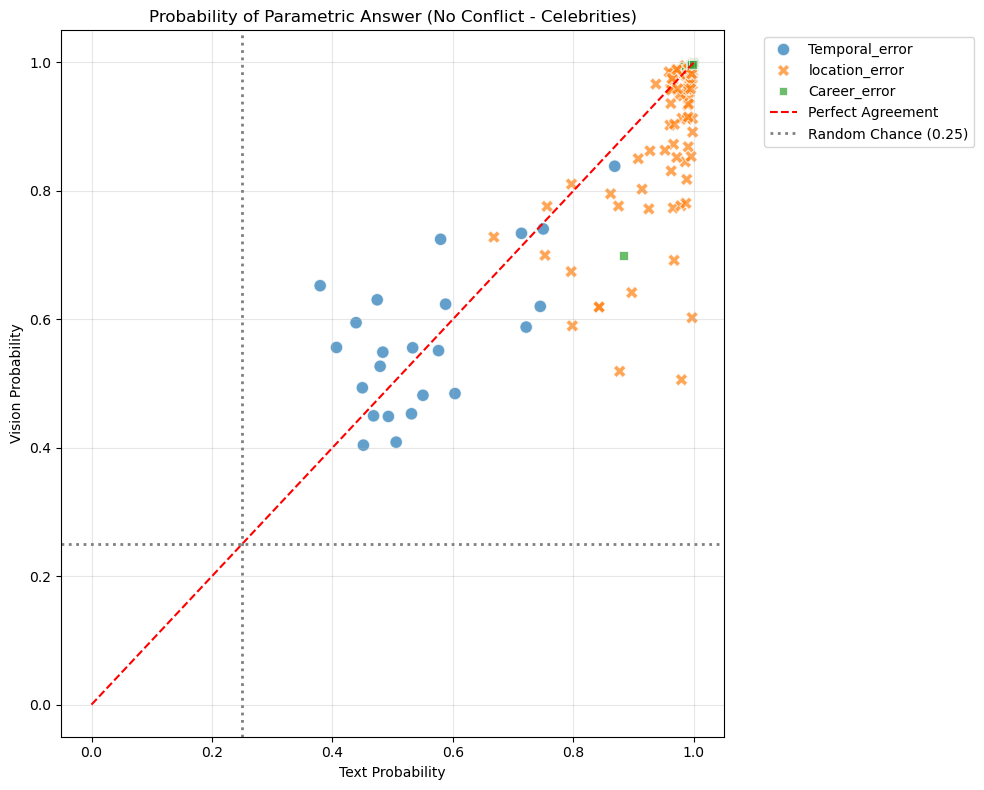

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr



# Function to extract the probability of the ground truth answer
def get_parametric_prob(row):
    return row[f"Prob_{row['Ground_Truth']}"]

# 1. Prepare the data
plot_df = pd.DataFrame({
    'Category': df_lang['Category'],
    'Text_Prob': df_lang.apply(get_parametric_prob, axis=1),
    'Vision_Prob': df_vis.apply(get_parametric_prob, axis=1)
})

r, p = pearsonr(plot_df['Text_Prob'], plot_df['Vision_Prob'])
print(f"Pearson r = {r:.3f}, p-value = {p:.3e}")

plot_df['Delta'] = plot_df['Vision_Prob'] - plot_df['Text_Prob']

mean_delta = plot_df['Delta'].mean()
std_delta = plot_df['Delta'].std()

print(f"Mean (Vision − Text): {mean_delta:.3f}")
print(f"Std Dev: {std_delta:.3f}")

# 2. Create the Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=plot_df,
    x='Text_Prob',
    y='Vision_Prob',
    hue='Category',
    style='Category',
    s=80,
    alpha=0.7
)

# 3. Add lines
# Diagonal reference (Perfect Agreement)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Agreement')

# Random Chance Baselines (0.25)
plt.axvline(x=0.25, color='gray', linestyle=':', linewidth=2, label='Random Chance (0.25)')
plt.axhline(y=0.25, color='gray', linestyle=':', linewidth=2)

plt.title('Probability of Parametric Answer (No Conflict - Celebrities)')
plt.xlabel('Text Probability')
plt.ylabel('Vision Probability')

# 4. Final Formatting
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='-', alpha=0.3)
plt.tight_layout()

plt.show()

In [91]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df_lang = df[~df['Instance'].isin(unknown_celebs)]
df_lang
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_VISION_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df_vis = df[~df['Instance'].isin(unknown_celebs)]
df_vis

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Taylor Swift,Temporal_error,mis_knowledge1,"Taylor Swift was born on December 13, 1988. Ta...",What year was the entity born? Answers: A) 198...,system\nYou are a helpful assistant.\nuser\nCo...,0.994629,0.004326,0.000329,0.000690,C,A
1,1,Taylor Swift,Temporal_error,mis_knowledge2,"Taylor Swift was born on December 13, 1990. Ta...",What year was the entity born? Answers: A) 198...,system\nYou are a helpful assistant.\nuser\nCo...,0.001130,0.995605,0.002045,0.001406,C,B
2,1,Taylor Swift,location_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,0.000566,0.998535,0.000284,0.000458,D,B
3,1,Taylor Swift,location_error,mis_knowledge2,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,0.409424,0.150635,0.003983,0.435791,D,A
4,1,Taylor Swift,Career_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.259766,0.739746,0.000180,0.000109,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,148,Chadwick Boseman,Career_error,mis_knowledge2,"Chadwick Boseman was born on November 29, 1976...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.270752,0.003601,0.724609,0.000977,C,A
576,149,Lupita Nyong'o,location_error,mis_knowledge1,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,0.999023,0.000830,0.000052,0.000038,B,A
577,149,Lupita Nyong'o,location_error,mis_knowledge2,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the nationality of the entity? Answers...,system\nYou are a helpful assistant.\nuser\nCo...,0.001263,0.001168,0.997559,0.000134,B,C
578,149,Lupita Nyong'o,Career_error,mis_knowledge1,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.636719,0.362549,0.000339,0.000528,B,A


In [92]:
# Find the rows where vision and text answered differently 
prob_cols = ['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']

pred_lang = df_lang[prob_cols].idxmax(axis=1)
pred_vis = df_vis[prob_cols].idxmax(axis=1)

differing_mask = pred_lang != pred_vis
diff_df = df_lang[differing_mask].copy()

diff_df['Lang_Prediction'] = pred_lang[differing_mask]
diff_df['Vis_Prediction'] = pred_vis[differing_mask]
diff_df = diff_df.join(df_vis[prob_cols].add_suffix('_Vis'))


print(f"Number of instances with different predictions: {len(diff_df)}")
cols_to_show = ['ID', 'Instance', 'Category', 'Mis_Knowledge_Key', 'Query', 'Lang_Prediction', 'Vis_Prediction', 'Ground_Truth']
print(f"Number of instances where Vision predicts parametric but not Lang = {(diff_df['Vis_Prediction'].apply(lambda x: x[-1]) == diff_df['Ground_Truth']).mean()}")
diff_df[cols_to_show]

Number of instances with different predictions: 81
Number of instances where Vision predicts parametric but not Lang = 0.9753086419753086


,ID,Instance,Category,Mis_Knowledge_Key,Query,Lang_Prediction,Vis_Prediction,Ground_Truth
3,1,Taylor Swift,location_error,mis_knowledge2,What is the nationality of the entity? Answers...,Prob_A,Prob_D,D
12,3,Cristiano Ronaldo,Career_error,mis_knowledge1,What is the occupation of the entity? Answers:...,Prob_C,Prob_B,B
16,4,Dwayne Johnson,Career_error,mis_knowledge1,What is the occupation of the entity? Answers:...,Prob_D,Prob_B,B
20,5,Kim Kardashian,Career_error,mis_knowledge1,What is the occupation of the entity? Answers:...,Prob_C,Prob_B,B
27,7,Barack Obama,location_error,mis_knowledge2,What is the nationality of the entity? Answers...,Prob_C,Prob_B,B
...,...,...,...,...,...,...,...,...
543,140,Will Ferrell,location_error,mis_knowledge2,What is the nationality of the entity? Answers...,Prob_A,Prob_C,C
553,143,Jonah Hill,location_error,mis_knowledge2,What is the nationality of the entity? Answers...,Prob_A,Prob_B,B
567,146,Kristen Stewart,Career_error,mis_knowledge2,What is the occupation of the entity? Answers:...,Prob_A,Prob_C,C
574,148,Chadwick Boseman,Career_error,mis_knowledge1,What is the occupation of the entity? Answers:...,Prob_B,Prob_C,C


In [93]:
diff_df[diff_df['Category'] == 'Career_error']

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label,Lang_Prediction,Vis_Prediction,Prob_A_Vis,Prob_B_Vis,Prob_C_Vis,Prob_D_Vis
12,3,Cristiano Ronaldo,Career_error,mis_knowledge1,"Cristiano Ronaldo was born on February 5, 1985...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.001673,0.101868,0.894043,0.002415,B,C,Prob_C,Prob_B,0.001565,0.767578,0.230469,0.000466
16,4,Dwayne Johnson,Career_error,mis_knowledge1,"Dwayne Johnson was born on May 2, 1972. Dwayne...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.002953,0.083618,0.000446,0.913086,B,D,Prob_D,Prob_B,0.001943,0.625000,0.000156,0.373047
20,5,Kim Kardashian,Career_error,mis_knowledge1,"Kim Kardashian was born on October 21, 1980. K...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.001066,0.443604,0.552246,0.003206,B,C,Prob_C,Prob_B,0.000960,0.859863,0.138184,0.001252
28,7,Barack Obama,Career_error,mis_knowledge1,"[Barack Obama] was born in [August 4, 1961]. [...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.197998,0.004921,0.795410,0.001398,A,C,Prob_C,Prob_A,0.958496,0.001080,0.040192,0.000267
29,7,Barack Obama,Career_error,mis_knowledge2,"[Barack Obama] was born in [August 4, 1961]. [...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.095154,0.002151,0.000072,0.902832,A,D,Prob_D,Prob_A,0.925781,0.000684,0.000040,0.073669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,136,Jim Carrey,Career_error,mis_knowledge2,"[Jim Carrey] was born in [January 17, 1962]. [...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.569336,0.429932,0.000082,0.000405,B,A,Prob_A,Prob_B,0.334473,0.665527,0.000047,0.000129
541,139,Steve Carell,Career_error,mis_knowledge2,"Steve Carell was born in August 16, 1962. Stev...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.031128,0.000430,0.000091,0.968262,A,D,Prob_D,Prob_A,0.519043,0.000598,0.000109,0.480225
567,146,Kristen Stewart,Career_error,mis_knowledge2,"Kristen Stewart was born on April 9, 1990. Kri...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.966309,0.006020,0.025742,0.002064,C,A,Prob_A,Prob_C,0.323242,0.009613,0.663086,0.003944
574,148,Chadwick Boseman,Career_error,mis_knowledge1,"Chadwick Boseman was born on November 29, 1976...",What is the occupation of the entity? Answers:...,system\nYou are a helpful assistant.\nuser\nCo...,0.001365,0.886719,0.110962,0.001006,C,B,Prob_B,Prob_C,0.003817,0.195801,0.798828,0.001437


In [94]:
(diff_df['Ground_Truth'].value_counts())

Ground_Truth
B    33
A    21
D    14
C    13
Name: count, dtype: int64

In [95]:
df_lang['Ground_Truth'].value_counts()/df_lang.shape[0]

Ground_Truth
A    0.300725
B    0.297101
C    0.213768
D    0.188406
Name: count, dtype: float64

In [96]:
for target_class in ['A', 'B', 'C', 'D']:
    simulated_stats = []
    n_iterations = 100000
    sample_size = diff_df.shape[0]
    pool = df_lang['Ground_Truth'].to_numpy()
    observed_stat = (diff_df['Ground_Truth'].value_counts()/diff_df.shape[0])[target_class]
    print(f"Running {n_iterations} simulations...")
    for i in range(n_iterations):
        sample = np.random.choice(pool, size=sample_size, replace=False)
        
        sim_stat = (sample == target_class).mean()
        simulated_stats.append(sim_stat)

    simulated_stats = np.array(simulated_stats)
    count_larger = (simulated_stats >= observed_stat).sum()
    p_value = count_larger / n_iterations
    p_value
    print(f'P_value for {target_class} is {p_value}')

Running 100000 simulations...
P_value for A is 0.84458
Running 100000 simulations...
P_value for B is 0.01495
Running 100000 simulations...
P_value for C is 0.92497
Running 100000 simulations...
P_value for D is 0.70118


# ***Logo visualizations***

## Find where ground truth cant be answered

In [30]:
df_inherent_text = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_Experiment_Results_logo.csv")
df_inherent_vision = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results_logo.csv")
df_inherent_text

def get_correct_indices(df):
    # 1. Define the probability columns
    prob_cols = ['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']
    
    # 2. Find the column name with the max value for each row (e.g., "Prob_A")
    # idxmax(axis=1) returns the column label of the maximum value
    predicted_col = df[prob_cols].idxmax(axis=1)
    
    # 3. Clean the prediction to match Ground_Truth format (e.g., "Prob_A" -> "A")
    predicted_choice = predicted_col.str.replace('Prob_', '')
    
    # 4. Compare with Ground Truth
    # We strip whitespace from both just to be safe (e.g. " A" vs "A")
    is_correct = predicted_choice.str.strip() == df['Ground_Truth'].str.strip()
    
    return is_correct

# Get the boolean mask (True/False) for both dataframes
text_correct_mask = get_correct_indices(df_inherent_text)
vision_correct_mask = get_correct_indices(df_inherent_vision)

# Find where BOTH are True
# We use the bitwise AND operator '&'
both_correct_mask = text_correct_mask & vision_correct_mask

# Extract the actual indices
correct_indices = df_inherent_text.index[both_correct_mask].tolist()

print(f"Number of matches: {len(correct_indices)}")
print("Indices:", correct_indices)

Number of matches: 159
Indices: [1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 15, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 36, 37, 38, 40, 41, 44, 46, 47, 49, 50, 52, 53, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 74, 77, 80, 81, 82, 83, 85, 86, 87, 89, 91, 92, 93, 95, 97, 98, 99, 100, 101, 103, 104, 107, 109, 110, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 127, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 167, 169, 171, 172, 173, 175, 176, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 197, 199, 200, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 217, 218, 220, 221]


In [31]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Top_decoded_token,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Nike,creator_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.002186,0.861328,0.134155,0.002119,B,C
1,1,Nike,creator_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.004887,0.884766,0.006248,0.104065,B,D
2,1,Nike,content_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,C,0.000801,0.286621,0.709473,0.002979,C,B
3,1,Nike,content_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,D,0.000799,0.000558,0.344727,0.653809,C,D
4,2,Coca-Cola,time_error,mis_knowledge1,Coca-Cola was created in 1890. The creator of ...,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.000901,0.976562,0.017059,0.005585,D,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,73,GitHub,content_error,mis_knowledge2,GitHub was created in 2008. The creators of Gi...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,D,0.001978,0.017776,0.054321,0.925781,D,C
314,74,Meta,creator_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.000272,0.999512,0.000215,0.000061,A,B
315,74,Meta,creator_error,mis_knowledge2,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,D,0.001464,0.001233,0.000344,0.997070,A,D
316,74,Meta,content_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,A,0.982910,0.007744,0.007053,0.002052,C,A


In [32]:
df['Category'].value_counts()

Category
content_error    146
creator_error    130
time_error        42
Name: count, dtype: int64

Overall Accuracy: 50.94%
Category
content_error    60.958904
creator_error    56.153846
time_error        0.000000
Name: Is_Correct, dtype: float64


/tmp/ipykernel_3214383/3291027162.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


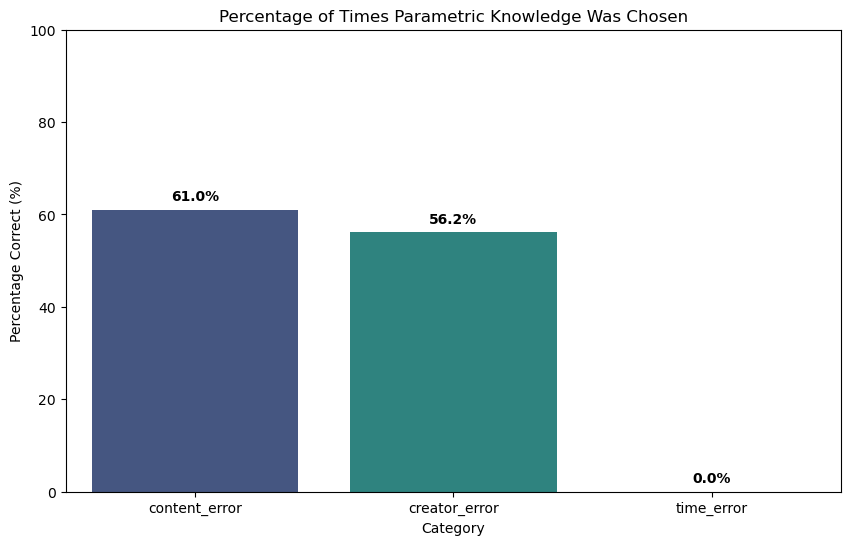

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('Percentage of Times Parametric Knowledge Was Chosen')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

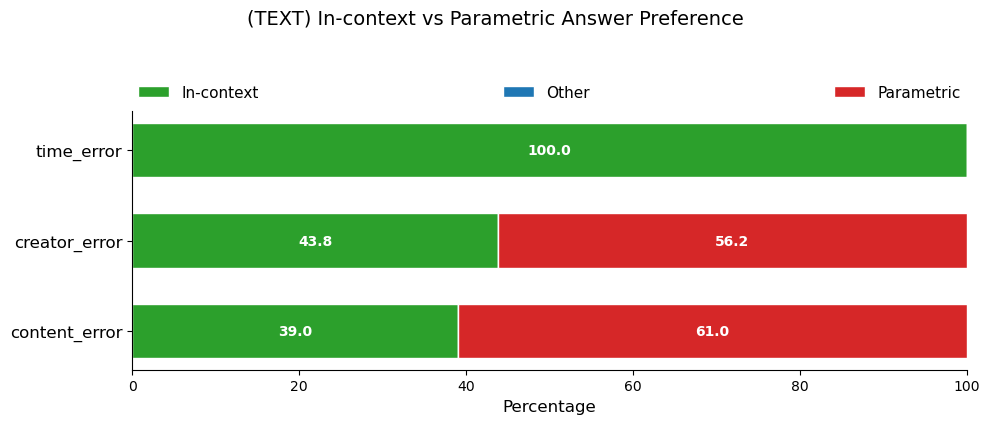

In [34]:
def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(TEXT) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [35]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_Experiment_Results_logo.csv")
df

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Nike,time_error,mis_knowledge1,NaN,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nGi...,0.472412,0.351074,0.100586,0.075928,C,A
1,1,Nike,creator_error,mis_knowledge1,NaN,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nGi...,0.003349,0.996094,0.000192,0.000388,B,C
2,1,Nike,content_error,mis_knowledge1,NaN,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nGi...,0.000440,0.000134,0.999023,0.000626,C,B
3,2,Coca-Cola,time_error,mis_knowledge1,NaN,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nGi...,0.097961,0.036896,0.057587,0.807617,D,B
4,2,Coca-Cola,creator_error,mis_knowledge1,NaN,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nGi...,0.000721,0.998535,0.000225,0.000427,B,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,73,GitHub,creator_error,mis_knowledge1,NaN,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nGi...,0.011856,0.987305,0.000306,0.000505,B,D
218,73,GitHub,content_error,mis_knowledge1,NaN,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nGi...,0.001185,0.001955,0.000226,0.996582,D,A
219,74,Meta,time_error,mis_knowledge1,NaN,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nGi...,0.373779,0.367920,0.093750,0.164551,D,B
220,74,Meta,creator_error,mis_knowledge1,NaN,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nGi...,0.998047,0.001293,0.000090,0.000583,A,B


Overall Accuracy: 75.68%
Category
content_error    98.648649
creator_error    89.189189
time_error       39.189189
Name: Is_Correct, dtype: float64


/tmp/ipykernel_3214383/2659512089.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


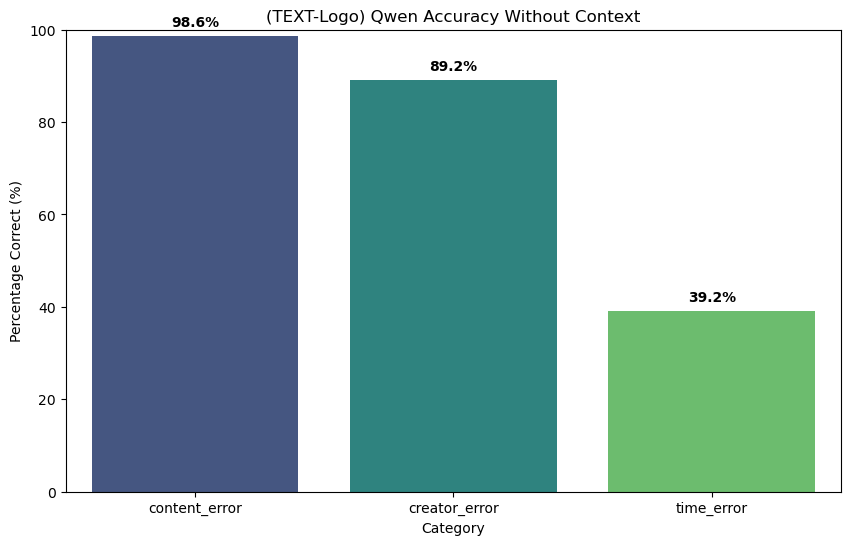

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('(TEXT-Logo) Qwen Accuracy Without Context')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()


In [37]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_VISION_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Top_decoded_token,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Nike,creator_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.002430,0.960938,0.035553,0.000883,B,C
1,1,Nike,creator_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.002785,0.979980,0.001207,0.016083,B,D
2,1,Nike,content_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,C,0.000166,0.003523,0.996094,0.000098,C,B
3,1,Nike,content_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,C,0.000207,0.000127,0.870117,0.129395,C,D
4,2,Coca-Cola,time_error,mis_knowledge1,Coca-Cola was created in 1890. The creator of ...,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.000349,0.993164,0.005291,0.001435,D,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,73,GitHub,content_error,mis_knowledge2,GitHub was created in 2008. The creators of Gi...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,D,0.000981,0.002720,0.020569,0.975586,D,C
314,74,Meta,creator_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,B,0.000201,0.999512,0.000080,0.000029,A,B
315,74,Meta,creator_error,mis_knowledge2,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,D,0.005814,0.000881,0.000312,0.993164,A,D
316,74,Meta,content_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,A,0.519043,0.006718,0.465332,0.008659,C,A


Overall Accuracy: 63.84%
Category
content_error    80.136986
creator_error    64.615385
time_error        4.761905
Name: Is_Correct, dtype: float64


/tmp/ipykernel_3214383/3291027162.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


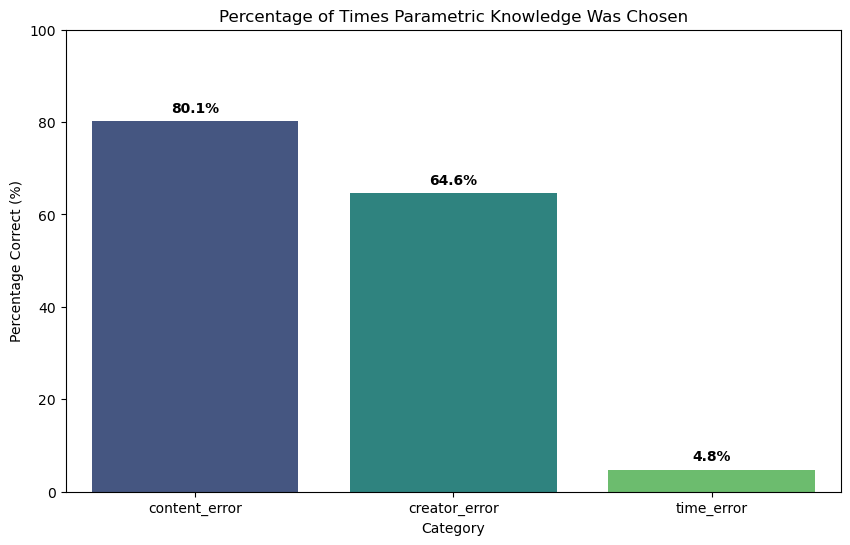

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('Percentage of Times Parametric Knowledge Was Chosen')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

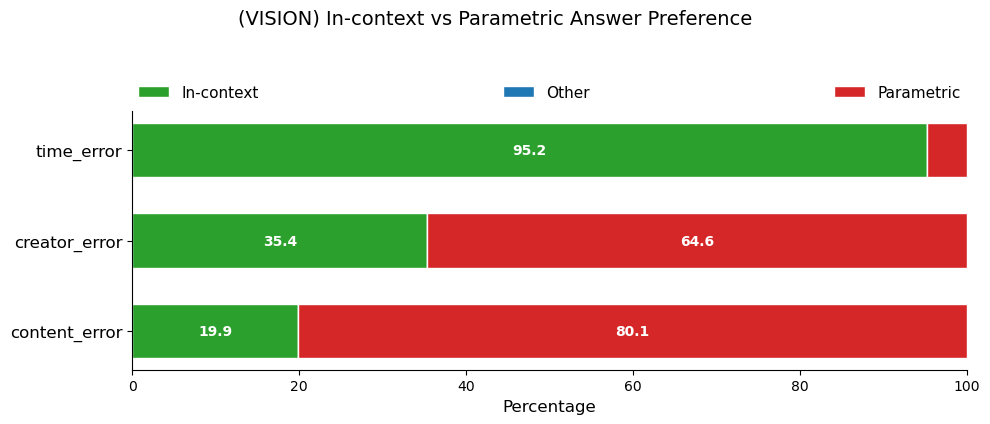

In [39]:
def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(VISION) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [107]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results_logo.csv")

Overall Accuracy: 74.32%
Category
content_error    100.000000
creator_error     87.837838
time_error        35.135135
Name: Is_Correct, dtype: float64


/tmp/ipykernel_1089477/3467363854.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


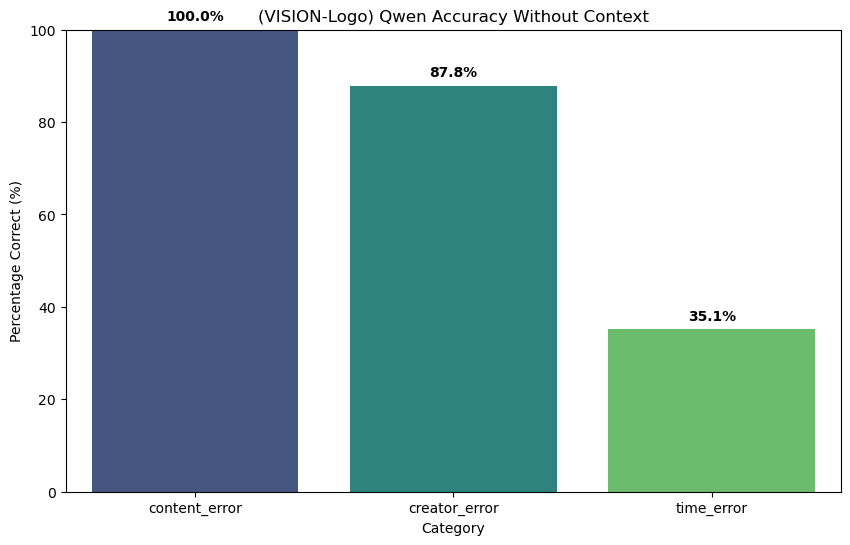

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('(VISION-Logo) Qwen Accuracy Without Context')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

In [123]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df_text = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df_text
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_VISION_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df_vis = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
def get_correct_indices(df_):
    prob_cols = ["Prob_A", "Prob_B", "Prob_C", "Prob_D"]
    predicted_choice = df_[prob_cols].idxmax(axis=1).str.replace("Prob_", "").str.strip()
    return predicted_choice == df_["Ground_Truth"].str.strip()

correct_indices = df_inherent_text.index[
    get_correct_indices(df_inherent_text) & get_correct_indices(df_inherent_vision)
].tolist()

df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
corr_inst_cat = df_inherent_text_corr[["Instance", "Category"]].drop_duplicates()

df_vis = df_vis.drop_duplicates(subset=["Instance", "Category", "Mis_Knowledge_Key"])
df_vis = df_vis.merge(corr_inst_cat, on=["Instance", "Category"], how="inner")
df_vis = df_vis[~df_vis["Instance"].isin(unknown_celebs)]

df_text = df_text.drop_duplicates(subset=["Instance", "Category", "Mis_Knowledge_Key"])
df_text = df_text.merge(corr_inst_cat, on=["Instance", "Category"], how="inner")
df_text = df_text[~df_text["Instance"].isin(unknown_celebs)]

df_merged = pd.merge(
    df_vis, df_text,
    on=["ID", "Category", "Mis_Knowledge_Key"],
    suffixes=("_vis", "_text")
)

prob_cols_vis  = ["Prob_A_vis", "Prob_B_vis", "Prob_C_vis", "Prob_D_vis"]
prob_cols_text = ["Prob_A_text", "Prob_B_text", "Prob_C_text", "Prob_D_text"]
df_merged["Pred_vis"]  = df_merged[prob_cols_vis].idxmax(axis=1).str.extract(r"Prob_([A-D])")
df_merged["Pred_text"] = df_merged[prob_cols_text].idxmax(axis=1).str.extract(r"Prob_([A-D])")

#same_pred_mask = (df_merged["Pred_vis"] == df_merged["Pred_text"]) & (df_merged["Pred_vis"] == df_merged["Mis_Answer_Label_vis"])
#vis_corr_text_wrong_mask = (df_merged["Pred_vis"] == df_merged["Ground_Truth_vis"]) & (df_merged["Pred_text"] != df_merged["Ground_Truth_vis"])
same_pred_mask = (df_merged["Pred_vis"] == df_merged["Pred_text"])
vis_corr_text_wrong_mask = (df_merged["Pred_vis"] != df_merged["Pred_text"])
df_merged["Group"] = "Exclude"
df_merged.loc[same_pred_mask, "Group"] = "Others"
df_merged.loc[vis_corr_text_wrong_mask, "Group"] = "VisCorrect_TextWrong"

analysis_df = df_merged[df_merged["Group"] != "Exclude"].copy()
analysis_df = analysis_df.drop_duplicates(subset=["ID", "Category", "Mis_Knowledge_Key"])
analysis_df

,ID,Instance_vis,Category,Mis_Knowledge_Key,Context_vis,Query_vis,Response_vis,Prob_A_vis,Prob_B_vis,Prob_C_vis,...,Response_text,Prob_A_text,Prob_B_text,Prob_C_text,Prob_D_text,Ground_Truth_text,Mis_Answer_Label_text,Pred_vis,Pred_text,Group
0,1,Nike,creator_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.009232,0.986816,0.002750,...,system\nYou are a helpful assistant.\nuser\nCo...,0.004021,0.976562,0.016678,0.002808,B,C,B,B,Others
1,1,Nike,creator_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.013199,0.984863,0.000242,...,system\nYou are a helpful assistant.\nuser\nCo...,0.005608,0.988281,0.000551,0.005783,B,D,B,B,Others
2,1,Nike,content_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.000410,0.001523,0.997559,...,system\nYou are a helpful assistant.\nuser\nCo...,0.000500,0.035339,0.962891,0.001403,C,B,C,C,Others
3,1,Nike,content_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.000316,0.000096,0.876953,...,system\nYou are a helpful assistant.\nuser\nCo...,0.000281,0.000164,0.817383,0.182373,C,D,C,C,Others
4,2,Coca-Cola,time_error,mis_knowledge1,Coca-Cola was created in 1890. The creator of ...,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nCo...,0.001217,0.991699,0.003868,...,system\nYou are a helpful assistant.\nuser\nCo...,0.002949,0.979004,0.009827,0.008400,D,B,B,B,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,73,GitHub,content_error,mis_knowledge2,GitHub was created in 2008. The creators of Gi...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.001390,0.001575,0.020584,...,system\nYou are a helpful assistant.\nuser\nCo...,0.000627,0.002022,0.005329,0.992188,D,C,D,D,Others
314,74,Meta,creator_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.005219,0.994629,0.000045,...,system\nYou are a helpful assistant.\nuser\nCo...,0.001356,0.998535,0.000033,0.000131,A,B,B,B,Others
315,74,Meta,creator_error,mis_knowledge2,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.067444,0.001574,0.000149,...,system\nYou are a helpful assistant.\nuser\nCo...,0.007866,0.001477,0.000132,0.990723,A,D,D,D,Others
316,74,Meta,content_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.932129,0.002420,0.064392,...,system\nYou are a helpful assistant.\nuser\nCo...,0.998535,0.000804,0.000146,0.000289,C,A,A,A,Others


In [124]:
analysis_df[['Group','']].value_counts()

Group                 Category     
Others                content_error    123
                      creator_error    118
                      time_error        41
VisCorrect_TextWrong  content_error     23
                      creator_error     12
                      time_error         1
Name: count, dtype: int64

NameError: name 'df_text' is not defined

## Logo With Vision-RAG

In [ ]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/Image_RAG_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Nike,creator_error,mis_knowledge1,The brand pictured was created in 1964. The cr...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.002142,0.994629,0.001997,0.001036,B,C
1,1,Nike,creator_error,mis_knowledge2,The brand pictured was created in 1964. The cr...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.003616,0.995117,0.000285,0.001221,B,D
2,1,Nike,content_error,mis_knowledge1,The brand pictured was created in 1964. The cr...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.000530,0.001925,0.997070,0.000702,C,B
3,1,Nike,content_error,mis_knowledge2,The brand pictured was created in 1964. The cr...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.000346,0.000225,0.990723,0.008636,C,D
4,2,Coca-Cola,time_error,mis_knowledge1,The brand pictured was created in 1890. The cr...,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nCo...,0.001498,0.988770,0.004875,0.004688,D,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,73,GitHub,content_error,mis_knowledge2,The brand pictured was created in 2008. The cr...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.000793,0.003416,0.003016,0.992676,D,C
314,74,Meta,creator_error,mis_knowledge1,The brand pictured was created in 2004. The cr...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.003403,0.996582,0.000056,0.000189,A,B
315,74,Meta,creator_error,mis_knowledge2,The brand pictured was created in 2004. The cr...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.150513,0.009254,0.000881,0.839355,A,D
316,74,Meta,content_error,mis_knowledge1,The brand pictured was created in 2004. The cr...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.144043,0.006741,0.842285,0.006847,C,A


Overall Accuracy: 75.47%
Category
content_error    96.575342
creator_error    74.615385
time_error        4.761905
Name: Is_Correct, dtype: float64


/tmp/ipykernel_1089477/3291027162.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


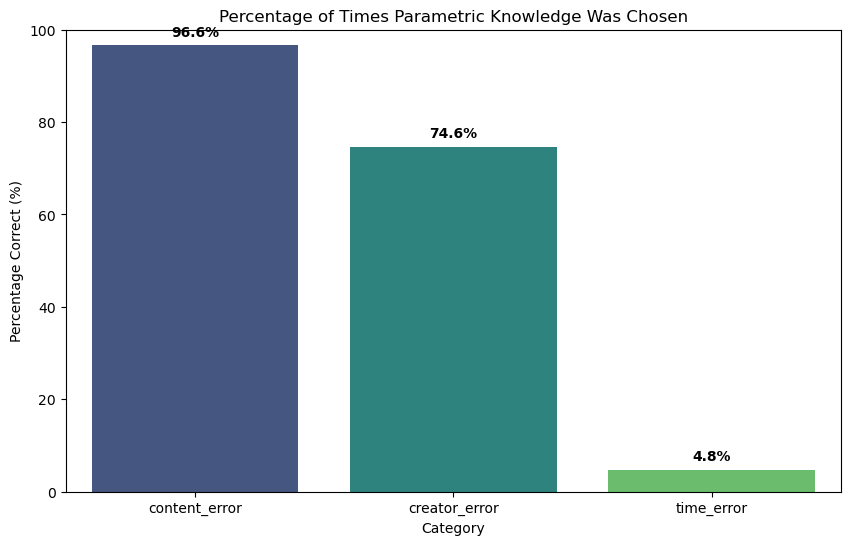

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('Percentage of Times Parametric Knowledge Was Chosen')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

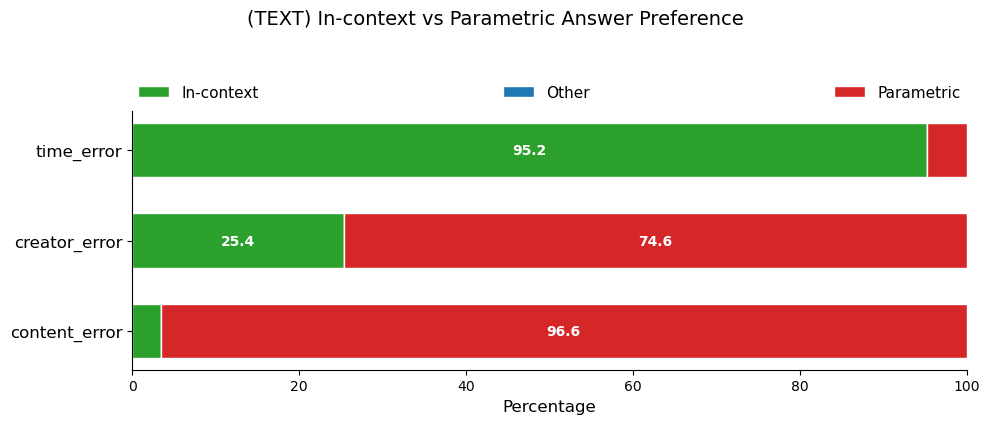

In [ ]:
def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(TEXT) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [52]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/Image_RAG_VISION_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Nike,creator_error,mis_knowledge1,The brand pictured was created in 1964. The cr...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.007336,0.991211,0.000883,0.000743,B,C
1,1,Nike,creator_error,mis_knowledge2,The brand pictured was created in 1964. The cr...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.013008,0.985840,0.000231,0.000965,B,D
2,1,Nike,content_error,mis_knowledge1,The brand pictured was created in 1964. The cr...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.000828,0.001115,0.997559,0.000319,C,B
3,1,Nike,content_error,mis_knowledge2,The brand pictured was created in 1964. The cr...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.000601,0.000194,0.997070,0.002268,C,D
4,2,Coca-Cola,time_error,mis_knowledge1,The brand pictured was created in 1890. The cr...,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nCo...,0.001481,0.992676,0.002598,0.003389,D,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,73,GitHub,content_error,mis_knowledge2,The brand pictured was created in 2008. The cr...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.004097,0.003044,0.013542,0.979492,D,C
314,74,Meta,creator_error,mis_knowledge1,The brand pictured was created in 2004. The cr...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.021286,0.978516,0.000082,0.000152,A,B
315,74,Meta,creator_error,mis_knowledge2,The brand pictured was created in 2004. The cr...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.514160,0.002308,0.000255,0.483154,A,D
316,74,Meta,content_error,mis_knowledge1,The brand pictured was created in 2004. The cr...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.260986,0.004745,0.731934,0.002121,C,A


Overall Accuracy: 75.16%
Category
content_error    96.575342
creator_error    73.846154
time_error        4.761905
Name: Is_Correct, dtype: float64


/tmp/ipykernel_1089477/3291027162.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')


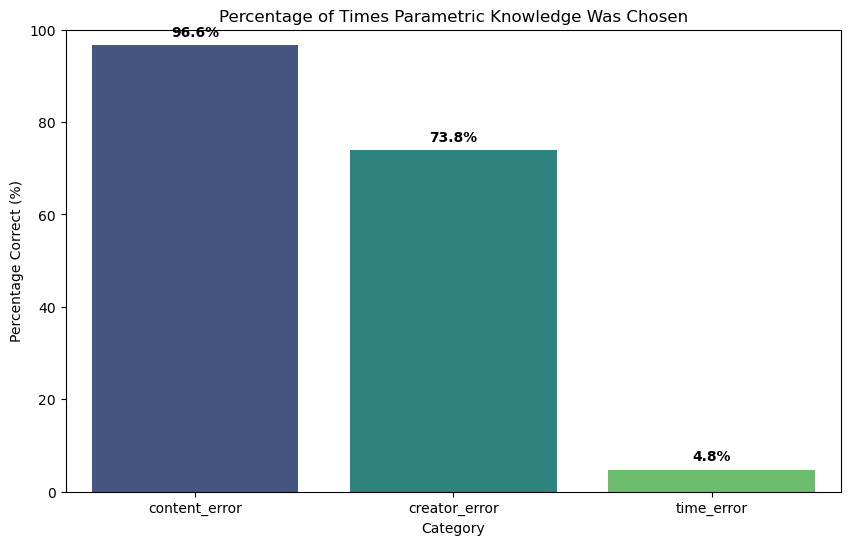

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

probs = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].values
df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']] = probs / probs.sum(axis=1, keepdims=True)

# ---------------------------------------------------------
# ANALYSIS CODE START
# ---------------------------------------------------------

# 1. Determine the model's chosen answer (highest probability)
# idxmax returns the column name (e.g., "Prob_A"). We strip "Prob_" to get "A".
df['Predicted_Choice'] = df[['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# 2. Check if it matches Ground Truth
df['Is_Correct'] = df['Predicted_Choice'] == df['Ground_Truth']

# 3. Calculate Percentage
overall_accuracy = df['Is_Correct'].mean() * 100
accuracy_by_category = df.groupby('Category')['Is_Correct'].mean() * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(accuracy_by_category)

# 4. Visualization
plt.figure(figsize=(10, 6))

# We can plot accuracy by category
sns.barplot(x=accuracy_by_category.index, y=accuracy_by_category.values, palette='viridis')

plt.ylabel('Percentage Correct (%)')
plt.xlabel('Category')
plt.title('Percentage of Times Parametric Knowledge Was Chosen')
plt.ylim(0, 100)

# Add text labels on bars
for i, v in enumerate(accuracy_by_category.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()

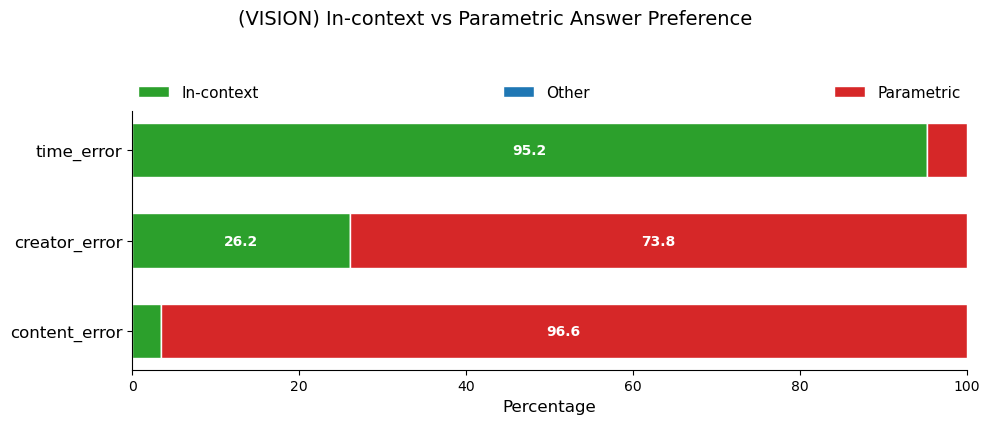

In [54]:
def classify_outcome(row):
    # Clean whitespace just in case (e.g., " A" vs "A")
    pred = str(row['Predicted_Choice'])
    gt = str(row['Ground_Truth'])
    mis = str(row['Mis_Answer_Label'])
    
    if pred == gt:
        return "Parametric"
    elif pred == mis:
        return "In-context"
    else:
        return "Other"

df['Outcome'] = df.apply(classify_outcome, axis=1)

group_col = 'Category' # Change to 'Model' if you have a model column
outcome_counts = df.groupby([group_col, 'Outcome']).size().unstack(fill_value=0)

# Calculate percentages
outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Ensure all columns exist (in case one category has 0 "Other")
for col in ['In-context', 'Parametric', 'Other']:
    if col not in outcome_pct.columns:
        outcome_pct[col] = 0

# Reorder columns to match the visual preference
# (e.g., In-context (Left), Parametric (Middle/Right), Other (Right))
outcome_pct = outcome_pct[['In-context', 'Other', 'Parametric']]


# ---------------------------------------------------------
# 4. Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 4))

# Define Colors matching the vibe of the reference
# Reference: Knowledge(Red), Other(Blue), Vision(Green)
# Your mapping: In-context (GT), Parametric (Mis), Other
colors = {
    'In-context': '#2ca02c',  # Green (Success/Ground Truth)
    'Other': '#1f77b4',       # Blue
    'Parametric': '#d62728'   # Red (Conflict/Mis-knowledge)
}
# Or if you want to strictly match the reference image's color-to-concept mapping:
# colors = {'In-context': '#d62728', 'Other': '#1f77b4', 'Parametric': '#2ca02c'}

# Stacked Bar Plot
y_pos = np.arange(len(outcome_pct))
height = 0.6

left_offset = np.zeros(len(outcome_pct))

categories = outcome_pct.columns # ['In-context', 'Other', 'Parametric']

for cat in categories:
    values = outcome_pct[cat].values
    ax.barh(y_pos, values, height, left=left_offset, color=colors[cat], label=cat, edgecolor='white')
    
    # Add percentage text inside bars
    for i, (val, left) in enumerate(zip(values, left_offset)):
        if val > 5: # Only show text if the bar is wide enough
            # Text color logic: white for dark bars
            ax.text(left + val/2, i, f'{val:.1f}', 
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    left_offset += values

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(outcome_pct.index, fontsize=12)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=12)

# Move Legend to top (like the reference)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

# Remove top and right spines for cleanliness
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle(
    "(VISION) In-context vs Parametric Answer Preference",
    fontsize=14,
    y=1.05  # adjust vertical position
)

plt.tight_layout()
plt.show()

In [ ]:
outcome_pct

Outcome,In-context,Other,Parametric
Category,,,
content_error,3.424658,0,96.575342
creator_error,26.153846,0,73.846154
time_error,95.238095,0,4.761905


# Compare vision to language

In [56]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_Experiment_Results_logo.csv")
df_lang = df.iloc[correct_indices]
df_lang
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results_logo.csv")
df_vis = df.iloc[correct_indices]
df_vis

,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
1,1,Nike,creator_error,mis_knowledge1,NaN,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nGi...,0.009705,0.989746,0.000142,0.000191,B,C
2,1,Nike,content_error,mis_knowledge1,NaN,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nGi...,0.000584,0.000138,0.999023,0.000236,C,B
3,2,Coca-Cola,time_error,mis_knowledge1,NaN,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nGi...,0.025482,0.020798,0.027115,0.926758,D,B
4,2,Coca-Cola,creator_error,mis_knowledge1,NaN,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nGi...,0.001116,0.998535,0.000249,0.000234,B,D
5,2,Coca-Cola,content_error,mis_knowledge1,NaN,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nGi...,0.000772,0.000515,0.998535,0.000278,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,72,Wikipedia,content_error,mis_knowledge1,NaN,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nGi...,0.001560,0.998047,0.000053,0.000150,B,D
217,73,GitHub,creator_error,mis_knowledge1,NaN,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nGi...,0.009338,0.990234,0.000174,0.000189,B,D
218,73,GitHub,content_error,mis_knowledge1,NaN,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nGi...,0.002249,0.001302,0.000209,0.996094,D,A
220,74,Meta,creator_error,mis_knowledge1,NaN,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nGi...,0.998535,0.000842,0.000082,0.000330,A,B


Pearson r = 0.938, p-value = 5.946e-74
Mean (Vision − Text): 0.014
Std Dev: 0.059


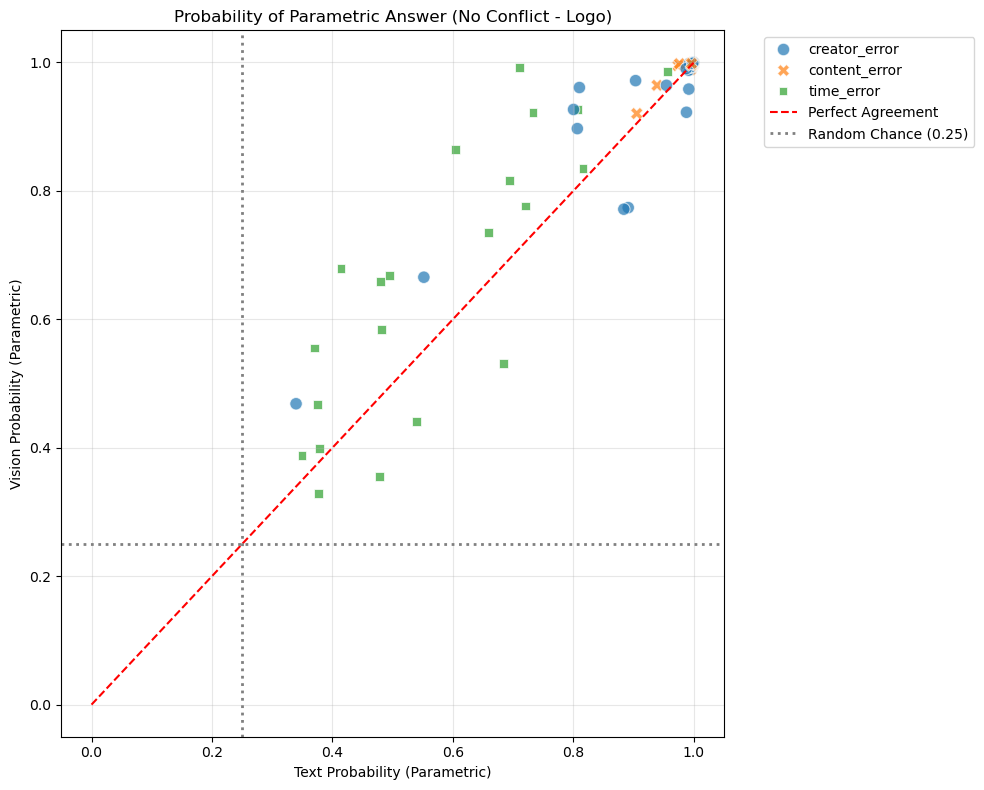

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to extract the probability of the ground truth answer
def get_parametric_prob(row):
    return row[f"Prob_{row['Ground_Truth']}"]

# 1. Prepare the data
plot_df = pd.DataFrame({
    'Category': df_lang['Category'],
    'Text_Prob': df_lang.apply(get_parametric_prob, axis=1),
    'Vision_Prob': df_vis.apply(get_parametric_prob, axis=1)
})

# 2. Create the Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=plot_df,
    x='Text_Prob',
    y='Vision_Prob',
    hue='Category',
    style='Category',
    s=80,
    alpha=0.7
)
r, p = pearsonr(plot_df['Text_Prob'], plot_df['Vision_Prob'])
print(f"Pearson r = {r:.3f}, p-value = {p:.3e}")

plot_df['Delta'] = plot_df['Vision_Prob'] - plot_df['Text_Prob']

mean_delta = plot_df['Delta'].mean()
std_delta = plot_df['Delta'].std()

print(f"Mean (Vision − Text): {mean_delta:.3f}")
print(f"Std Dev: {std_delta:.3f}")
# 3. Add lines
# Diagonal reference (Perfect Agreement)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Agreement')

# Random Chance Baselines (0.25)
plt.axvline(x=0.25, color='gray', linestyle=':', linewidth=2, label='Random Chance (0.25)')
plt.axhline(y=0.25, color='gray', linestyle=':', linewidth=2)

plt.title('Probability of Parametric Answer (No Conflict - Logo)')
plt.xlabel('Text Probability (Parametric)')
plt.ylabel('Vision Probability (Parametric)')

# 4. Final Formatting
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='-', alpha=0.3)
plt.tight_layout()

plt.show()

In [58]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df_lang = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df_lang 
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/RAG_VISION_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df_vis = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df_vis


,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Prob_A,Prob_B,Prob_C,Prob_D,Ground_Truth,Mis_Answer_Label
0,1,Nike,creator_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.009232,0.986816,0.002750,0.001077,B,C
1,1,Nike,creator_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.013199,0.984863,0.000242,0.001540,B,D
2,1,Nike,content_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.000410,0.001523,0.997559,0.000440,C,B
3,1,Nike,content_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.000316,0.000096,0.876953,0.122498,C,D
4,2,Coca-Cola,time_error,mis_knowledge1,Coca-Cola was created in 1890. The creator of ...,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nCo...,0.001217,0.991699,0.003868,0.003231,D,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,73,GitHub,content_error,mis_knowledge2,GitHub was created in 2008. The creators of Gi...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.001390,0.001575,0.020584,0.976562,D,C
314,74,Meta,creator_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.005219,0.994629,0.000045,0.000100,A,B
315,74,Meta,creator_error,mis_knowledge2,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,0.067444,0.001574,0.000149,0.930664,A,D
316,74,Meta,content_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,What are the main products of this brand? Answ...,system\nYou are a helpful assistant.\nuser\nCo...,0.932129,0.002420,0.064392,0.001153,C,A


In [59]:
# Find the rows where vision and text answered differently 
prob_cols = ['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']

pred_lang = df_lang[prob_cols].idxmax(axis=1)
pred_vis = df_vis[prob_cols].idxmax(axis=1)

differing_mask = pred_lang != pred_vis
diff_df = df_lang[differing_mask].copy()

diff_df['Lang_Prediction'] = pred_lang[differing_mask]
diff_df['Vis_Prediction'] = pred_vis[differing_mask]
diff_df = diff_df.join(df_vis[prob_cols].add_suffix('_Vis'))


print(f"Number of instances with different predictions: {len(diff_df)}")
cols_to_show = ['ID', 'Instance','Category' ,'Query', 'Lang_Prediction', 'Vis_Prediction', 'Ground_Truth']
out_df = diff_df[cols_to_show]
print(f"Percentage where Vision predicted parametric but not Lang = {(out_df['Vis_Prediction'].apply(lambda x: x[-1]) == out_df['Ground_Truth']).mean()}")
out_df

Number of instances with different predictions: 36
Percentage where Vision predicted parametric but not Lang = 0.8888888888888888


,ID,Instance,Category,Query,Lang_Prediction,Vis_Prediction,Ground_Truth
30,7,Samsung,content_error,What are the main products of this brand? Answ...,Prob_C,Prob_B,B
36,9,Toyota,creator_error,Who established the brand corresponding to the...,Prob_C,Prob_A,A
38,9,Toyota,content_error,What are the main products of this brand? Answ...,Prob_D,Prob_B,B
59,14,Netflix,creator_error,Who established the brand corresponding to the...,Prob_B,Prob_A,A
60,14,Netflix,content_error,What are the main products of this brand? Answ...,Prob_C,Prob_A,A
63,15,Tesla,content_error,What are the main products of this brand? Answ...,Prob_A,Prob_D,D
68,17,Mastercard,creator_error,Who established the brand corresponding to the...,Prob_B,Prob_A,B
71,17,Mastercard,content_error,What are the main products of this brand? Answ...,Prob_B,Prob_D,D
76,19,LG,content_error,What are the main products of this brand? Answ...,Prob_B,Prob_D,D
77,19,LG,content_error,What are the main products of this brand? Answ...,Prob_C,Prob_D,D
